In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [133]:
import os 
dir_path = os.path.dirname(os.path.realpath("Bank_Personal_Loan_Modelling.csv"))

In [100]:
bank = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
# No missing data
print(bank.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [39]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [11]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [41]:
# Binary categories: target variable personal loan, also securities account, CD account, online banking and credit card. 

# Personal loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
print(bank['Personal Loan'].value_counts(dropna = False))

# Securities Account - Does the customer have a securities account with the bank?
print(bank['Securities Account'].value_counts(dropna = False))

# CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
print(bank['CD Account'].value_counts(dropna = False))

# Online - Does the customer use internet banking facilities?
print(bank['Online'].value_counts(dropna = False))

# Credit Card - Does the customer use a credit card issued by UniversalBank?
print(bank['CreditCard'].value_counts(dropna = False))

0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


In [42]:
480 / 5000

0.096

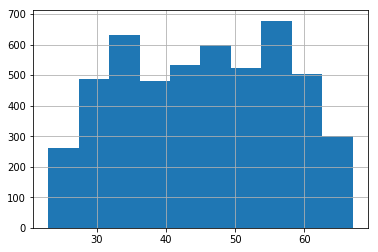

In [20]:
bank.Age.hist()

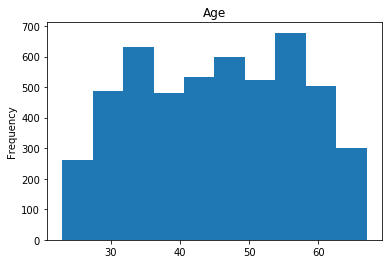

      ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89    90   25          -1     113     94303       4   2.30          3   
226  227   24          -1      39     94085       2   1.70          2   
315  316   24          -2      51     90630       3   0.30          3   
451  452   28          -2      48     94132       2   1.75          3   
524  525   24          -1      75     93014       4   0.20          1   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
89          0              0                   0           0       0   
226         0              0                   0           0       0   
315         0              0                   0           0       1   
451        89              0                   0           0       1   
524         0              0                   0           0       1   

     CreditCard  
89            1  
226           0  
315           0  
451           0  
524           0  
52


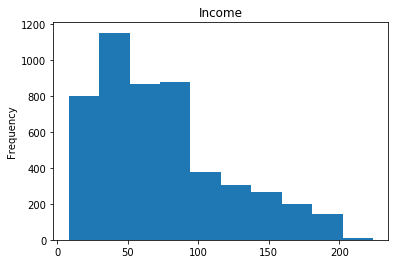

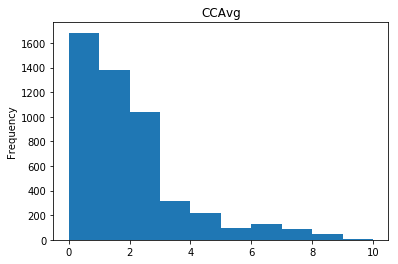

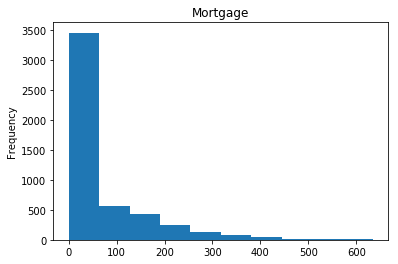

In [10]:
# Interval categories: age, experience, income, CC avg and mortgage.

# Age - ()
bank.Age.plot('hist')
plt.title("Age")
plt.show()

# Experience - Year of experience (negative - median)
print(bank.loc[bank.Experience < 0].head())
print(len(bank[bank.Experience < 0])) # 52

# Income - Annual income in dollars (which income, what the scale is?)
bank.Income.plot('hist')
plt.title("Income")
plt.show()

# CCAvg - Average credit card spending
bank['CCAvg'].plot('hist')
plt.title("CCAvg")
plt.show()

# Mortgage - Value of House Mortgage
bank['Mortgage'].plot('hist')
plt.title("Mortgage")
plt.show()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0


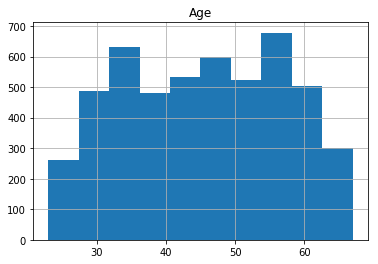

In [26]:
bank.hist("Age")
Wrong = bank.loc[(bank.Experience <0)]
Wrong.head()

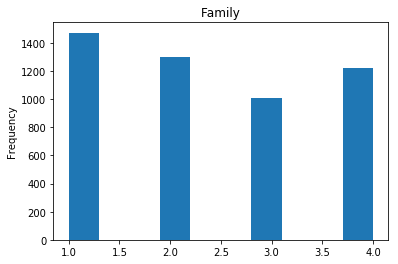

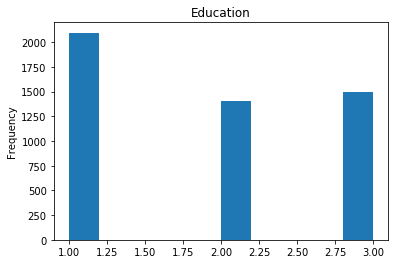

In [26]:
# Ordinal categories: family and education

# Family (mostly 1)
bank.Family.plot('hist')
plt.title("Family")
plt.show()

# Education - Education level of the customer (mostly 1)
bank['Education'].plot('hist')
plt.title("Education")
plt.show()

In [27]:
# Nominal categories: ID and Zip code

# ZIP Code (max '94720': 169; 467 zip codes)
bank['ZIP Code'] = bank['ZIP Code'].astype(np.str)
print(bank['ZIP Code'].value_counts(dropna=False).head())
print(len(bank['ZIP Code'].unique()))

94720    169
94305    127
95616    116
90095     71
93106     57
Name: ZIP Code, dtype: int64
467


## Data Cleaning

In [107]:
bank_age = bank[bank.Experience >= 0].groupby('Age').Experience.median().reset_index(name ='median_age')
bank = pd.merge(bank, bank_age, on = "Age", how = "left")

# Cleaning
bank.loc[bank.Experience < 0,'Experience'] = np.round(bank['median_age'])

KeyError: 'median_age'

In [111]:
# 23 years old == null
bank.loc[bank.Experience.isnull(), 'Experience'] = 0
bank.loc[bank.Age==23]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,median_age_x,median_age_y
670,671,23,0.0,61,92374,4,2.60,1,239,0,0,0,1,0,NaN,NaN
909,910,23,0.0,149,91709,1,6.33,1,305,0,0,0,0,1,NaN,NaN
2430,2431,23,0.0,73,92120,4,2.60,1,0,0,0,0,1,0,NaN,NaN
2618,2619,23,0.0,55,92704,3,2.40,2,145,0,0,0,1,0,NaN,NaN
2717,2718,23,0.0,45,95422,4,0.60,2,0,0,0,0,1,1,NaN,NaN
2962,2963,23,0.0,81,91711,2,1.80,2,0,0,0,0,0,0,NaN,NaN
3130,3131,23,0.0,82,92152,2,1.80,2,0,0,1,0,0,1,NaN,NaN
3157,3158,23,0.0,13,94720,4,1.00,1,84,0,0,0,1,0,NaN,NaN
3425,3426,23,0.0,12,91605,4,1.00,1,90,0,0,0,1,0,NaN,NaN
3824,3825,23,0.0,12,95064,4,1.00,1,0,0,1,0,0,1,NaN,NaN


In [114]:
# ZIP Code
bank['ZIP Code'] = bank['ZIP Code'].astype(str)
bank['Area'] = bank['ZIP Code'].str.slice(0, 3)
bank['Area'] = bank['Area'].astype('category')
bank['ZIP Code'] = bank['ZIP Code'].astype('category')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,median_age_x,median_age_y,Area
0,1,25,1.0,49,91107,4,1.60,1,0,0,1,0,0,0,1.0,1.0,911
1,2,45,19.0,34,90089,3,1.50,1,0,0,1,0,0,0,20.0,20.0,900
2,3,39,15.0,11,94720,1,1.00,1,0,0,0,0,0,0,14.0,14.0,947
3,4,35,9.0,100,94112,1,2.70,2,0,0,0,0,0,0,10.0,10.0,941
4,5,35,8.0,45,91330,4,1.00,2,0,0,0,0,0,1,10.0,10.0,913
5,6,37,13.0,29,92121,4,0.40,2,155,0,0,0,1,0,12.0,12.0,921
6,7,53,27.0,72,91711,2,1.50,2,0,0,0,0,1,0,28.0,28.0,917
7,8,50,24.0,22,93943,1,0.30,3,0,0,0,0,0,1,25.0,25.0,939
8,9,35,10.0,81,90089,3,0.60,2,104,0,0,0,1,0,10.0,10.0,900
9,10,34,9.0,180,93023,1,8.90,3,0,1,0,0,0,0,9.0,9.0,930


In [115]:
# Education, Online, Credit Card
bank['Education'] = bank['Education'].astype('category')
bank['Family'] = bank['Family'].astype('category')

In [122]:
bank.dtypes

ID                       int64
Age                      int64
Experience             float64
Income                   int64
ZIP Code              category
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
median_age_x           float64
median_age_y           float64
Area                  category
dtype: object

# Model Building

In [125]:
# bank.columns
bank_mod = bank[['Age', 'Experience', 'Income', 'Area'
                 , 'Family', 'CCAvg', 'Education', 'Mortgage'
                 , 'Securities Account', 'CD Account', 'Online', 'CreditCard'
                 , 'Personal Loan']]
bank_mod.head()

,Age,Experience,Income,Area,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1.0,49,911,4,1.6,1,0,1,0,0,0,0
1,45,19.0,34,900,3,1.5,1,0,1,0,0,0,0
2,39,15.0,11,947,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,941,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,913,4,1.0,2,0,0,0,0,1,0


In [128]:
# Decision Tree
# Save png
from sklearn.tree import export_graphviz
# If you don't have graphviz package, you need to install it https://anaconda.org/anaconda/graphviz
from IPython.display import Image

# Train, test split
import graphviz 
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree


X_train, X_test, y_train, y_test = train_test_split(bank_mod.iloc[:, 0:12], bank_mod['Personal Loan'], random_state=0)

# Build the decision tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy'
                                  #,max_depth = 3
                                  #,max_features = 10
                                  ,min_samples_leaf = 350
                                  ,min_samples_split = 500 
                                 )

"""
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
"""

y_pred = clf.fit(X_train, y_train).predict(X_test)

"""
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=churn.iloc[0, 0:10],  
                         class_names=list(set(str(churn.churndep))),  
                         filled=True, rounded=True,  
                         special_characters=True)
                         
graph = graphviz.Source(dot_data) 
"""



'\ndot_data = tree.export_graphviz(clf, out_file=None, \n                         feature_names=churn.iloc[0, 0:10],  \n                         class_names=list(set(str(churn.churndep))),  \n                         filled=True, rounded=True,  \n                         special_characters=True)\n                         \ngraph = graphviz.Source(dot_data) \n'

# How to draw a decision tree

In [140]:
# Where to save the figures
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

export_graphviz(
        clf,
        out_file=image_path("C:/Users/akabo/Downloads/intro to business analysis/tree.dot"),
        feature_names=list(bank_mod.columns.drop("Personal Loan")),
        class_names=list(map(str, bank_mod['Personal Loan'].unique())),
        rounded=True,
        filled=True
    )
# Converting .dot file to PNG Example: Run command "dot -Tpng of_tree.dot -o of_tree.png" in the terminal after installing graphviz package 
# and making sure you are in the right directory (same directory as the .dot file)
path_png = os.path.join(PROJECT_ROOT_DIR, "tree.png")
Image(path_png)

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

# Evaluation Process

In [135]:

 # Model Evaluation

# Predictive accuracy
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

print("Tree parameters: \n", clf)
accuracy = sum(y_pred == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels = [0, 1])

print("The Confusion matrix: \n", cnf_matrix)

# precision, recall, f-measure
ev_table = pd.DataFrame()
ev_table['Class'] = [0, 1]
ev_table.loc[ev_table.Class == 0, 'Precision'] = cnf_matrix[0, 0] / (cnf_matrix[0, 0] + cnf_matrix[1, 0])
ev_table.loc[ev_table.Class == 1, 'Precision'] = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[0, 1])
ev_table.loc[ev_table.Class == 0, 'Recall'] = cnf_matrix[0, 0] / (cnf_matrix[0, 0] + cnf_matrix[0, 1])
ev_table.loc[ev_table.Class == 1, 'Recall'] = cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[1, 0])
ev_table['F-measure'] = 2 * ev_table.Precision * ev_table.Recall / (ev_table.Precision + ev_table.Recall) 

print("Precision, recall, f-measure: \n", ev_table)
print(classification_report(y_test, y_pred))

Tree parameters: 
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=350, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
The predictive accuracy is:  0.95
The classification error is:  0.05
The Confusion matrix: 
 [[1114   28]
 [  30   78]]
Precision, recall, f-measure: 
    Class  Precision    Recall  F-measure
0      0   0.973776  0.975482   0.974628
1      1   0.735849  0.722222   0.728972
             precision    recall  f1-score   support

          0       0.97      0.98      0.97      1142
          1       0.74      0.72      0.73       108

avg / total       0.95      0.95      0.95      1250



# Evaluation Process by me

In [139]:
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
Confusion_Matrix = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=["1","0"],index=["1","o"])
print(Confusion_Matrix)
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred))


      1   0
1  1114  28
o    30  78
Accuracy (out-of-sample): 0.95
F1 score (out-of-sample):  0.7289719626168224


# Grid Search

In [29]:
# Grid Search and Cross Validation
import sklearn.grid_search as gs
from sklearn.tree import DecisionTreeClassifier # A decision tree classifier

grid_para_tree = [{"criterion": ["gini", "entropy"],
                   'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                   #, "max_features": list(range(1, 11))
                   'min_samples_leaf':[1,2,3,4,5],
                   'min_samples_split':[2,3,4,5]
                  }] 
grid_search_tree = gs.GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                                   param_grid=grid_para_tree,
                                   cv = 5,
                                   n_jobs = 4,
                                   scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

## best parameter
print(grid_search_tree.best_params_)

## best score
print("Best score: ", grid_search_tree.best_score_)

## The overall accuracy on the training set:
print("Training score: ", grid_search_tree.score(X_train, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", grid_search_tree.score(X_test, y_test))

C:\Users\jczsh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\jczsh\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score:  0.9848
Training score:  0.9877333333333334
Test accuracy:  0.9816


## My way of  grid search

In [55]:
from sklearn.tree import DecisionTreeClassifier # A decision tree classifier
# GridSearchCV performs an exhaustive search over specified parameter values for an estimator
# The parameters of the estimator used to apply these methods are optimized by cross-validated 
# grid-search over a parameter grid.
from sklearn.model_selection import GridSearchCV #http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'criterion':['gini','entropy'],
                               'min_samples_leaf':[1,2,3,4,5],'min_samples_split':[2,3,4,5]}],
                  scoring='accuracy',n_jobs = 4,
                  cv=5)

gs_dt = gs_dt.fit(X_train,y_train)
print(gs_dt.best_score_)
print(gs_dt.best_params_)


0.9848
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [30]:
clf_gs = tree.DecisionTreeClassifier(criterion = 'gini',
                                     max_depth = 5,
                                     min_samples_leaf = 5,
                                     min_samples_split = 2
                                 )
y_pred = clf_gs.fit(X_train, y_train).predict(X_test)

print("Tree parameters: \n", clf)
accuracy = sum(y_pred == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred))

Tree parameters: 
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=350, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
The predictive accuracy is:  0.98
The classification error is:  0.02
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1142
          1       0.88      0.91      0.89       108

avg / total       0.98      0.98      0.98      1250



# Put the grid search result back into Evaluation

In [60]:
clf_gs = tree.DecisionTreeClassifier(criterion = 'gini',
                                     max_depth = 5,
                                     min_samples_leaf = 5,
                                     min_samples_split = 2
                                 )
# y_pred = clf_gs.fit(X_train, y_train).predict(X_test)
# from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
# Confusion_Matrix = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=["1","0"],index=["1","o"])
# print(Confusion_Matrix)
# from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
# # Accuracy
# print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))

# # F1 score
# print('F1 score (out-of-sample): ', f1_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

      1   0
1  1129  13
o    10  98
Accuracy (out-of-sample): 0.98
F1 score (out-of-sample):  0.8949771689497718
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1142
          1       0.88      0.91      0.89       108

avg / total       0.98      0.98      0.98      1250



# Cross Validaton 

In [65]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(clf_gs, bank_mod.iloc[:, 0:12], bank_mod['Personal Loan'], 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV accuracy: 0.984 +/- 0.003


In [32]:
export_graphviz(
        clf_gs,
        out_file=image_path("of_tree.dot"),
        feature_names=list(bank_mod.columns.drop("Personal Loan")),
        class_names=list(map(str, bank_mod['Personal Loan'].unique())),
        rounded=True,
        filled=True
    )


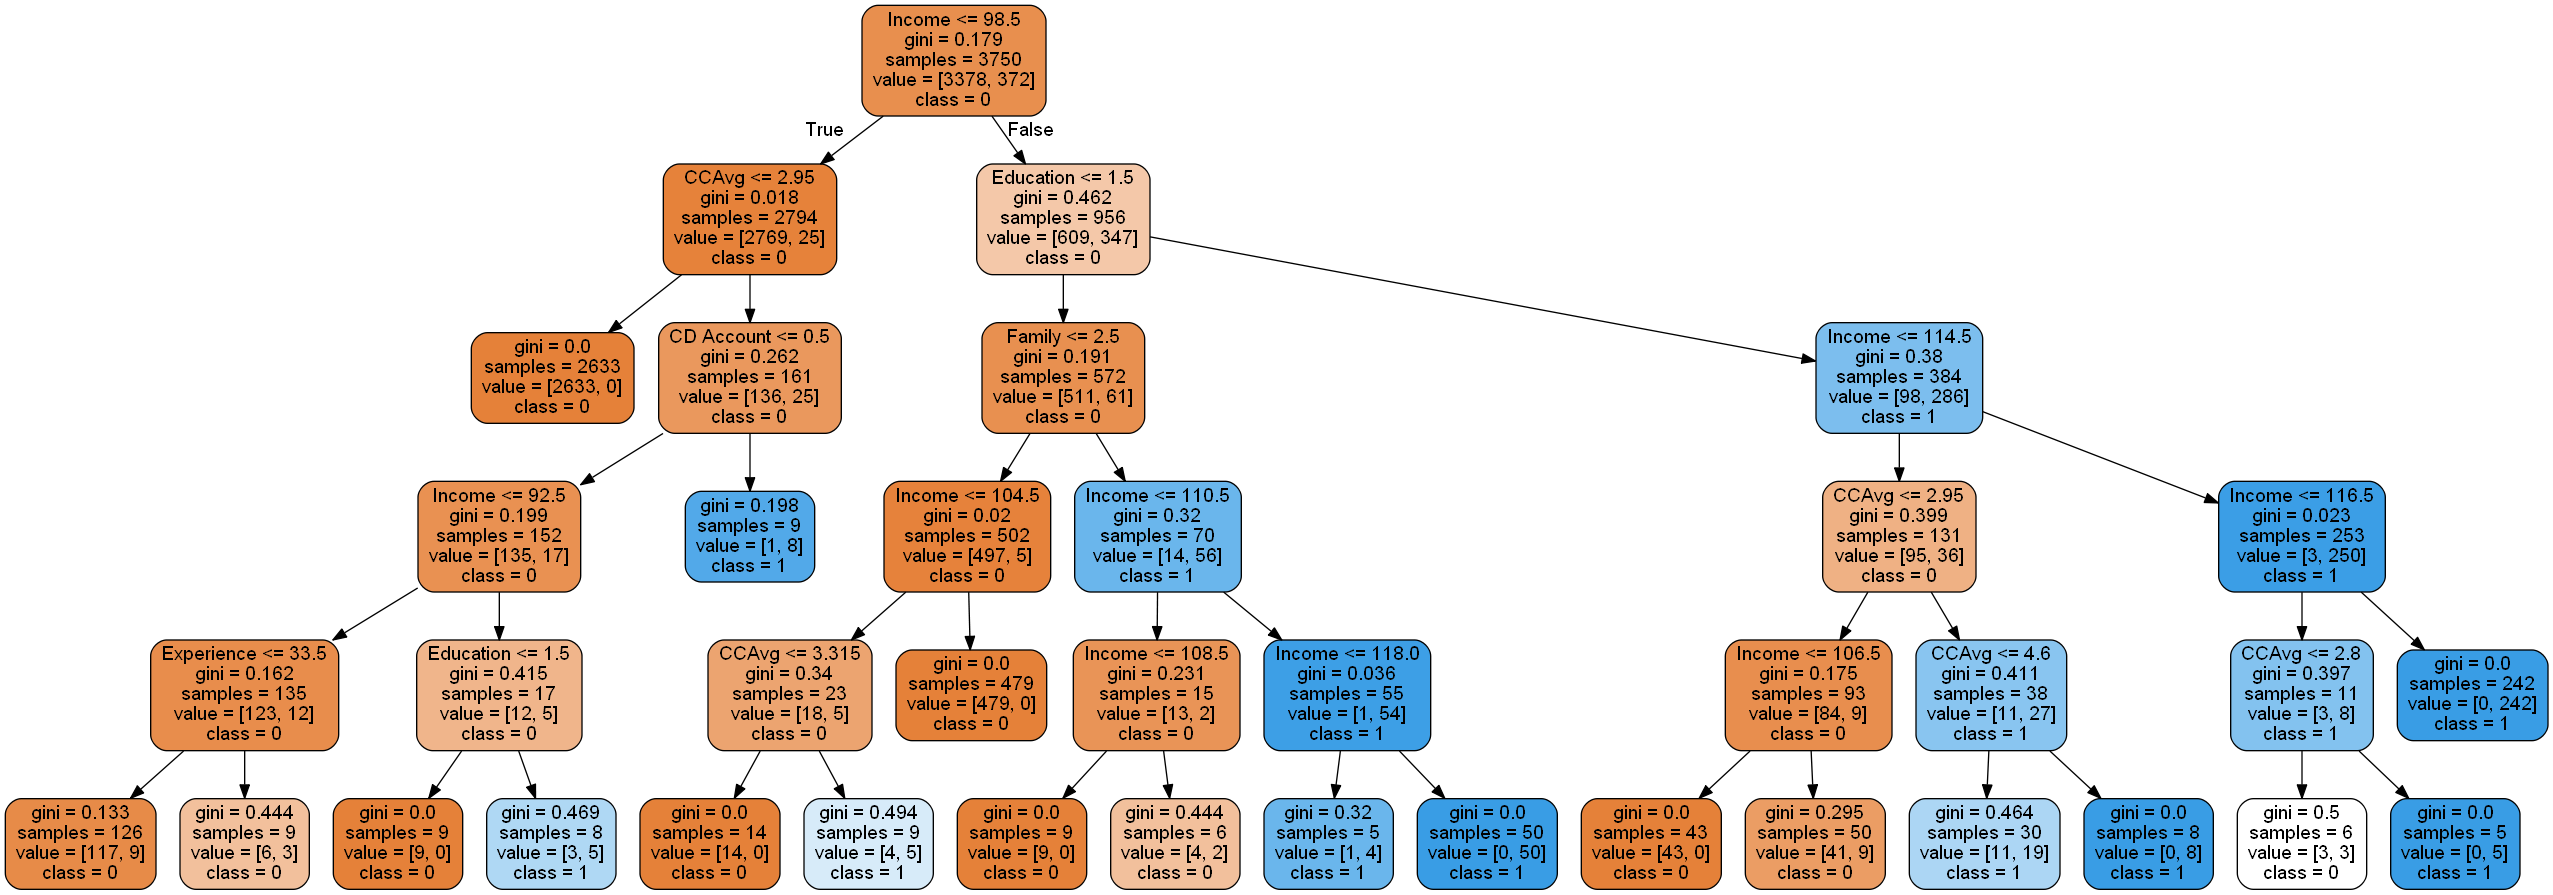

In [33]:
# Converting .dot file to PNG Example: Run command "dot -Tpng of_tree.dot -o of_tree.png" in the terminal after installing graphviz package 
# and making sure you are in the right directory (same directory as the .dot file)
path_png = os.path.join(PROJECT_ROOT_DIR, "images", "of_tree.png")
Image(path_png)

## Resample

In [99]:
X_imb = pd.concat([X_train, y_train], axis = 1)
X_imb = X_imb.rename(columns={'Personal Loan': 'y_imb'})
y_imb = X_imb['y_imb']

In [101]:
# Try Train Resample
# Class imbalance influences a learning algorithm during model fitting. 85% unbalanced
# Since machine learning algorithms typically optimize a reward or cost function that is computed as a 
# sum over the training examples that it sees furing fitting, the decision rule is likely going to be
# biased towards the majority class. In other words, the algorithm implicitly learns a mdoel tha optimizes the
# predictions based on the most abundant class in order to minimize the cost or maximize the reward during training.

from sklearn.utils import resample

# Number of class 1 samples before

print('Number of class 1 samples before:', X_imb[y_imb == '1'].shape[0])

# Resampling strategy = take the minority class from the imbalanced data set and repeatedly draw samples
# from it until it contains the same number of samples as class label 0

X_upsampled, y_upsampled = resample(X_imb[y_imb == '1'], # Indexable data-structures as input
                                    y_imb[y_imb == '1'],
                                    replace=True, # Implements resampling with replacement.
                                    n_samples=X_imb[y_imb == '0'].shape[0], # Number of samples to generate.
                                    random_state=0) # The seed of the pseudo random number generator to use when shuffling the data

# Number of class 1 samples after oversampling rare class
print('Number of class 1 samples after:', X_upsampled.shape[0])

Number of class 1 samples before: 372
Number of class 1 samples after: 3378


In [102]:
# After resampling, we can stack the original class 0 with the upsampled class 1 subset to obtain a balanced dataset
# as follows:

X_bal = np.vstack((X_imb[y_imb == '0'], X_upsampled))
y_bal = np.hstack((y_imb[y_imb == '0'], y_upsampled))

# Consequently if we were to predict the accuracy of the model that always predicts the majority class ~50%
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

0.0

In [111]:
X_imb[y_imb == '0']

,Age,Experience,Income,Area,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,y_imb
4820,42,17.0,44,941,1,0.30,3,0,1,1,1,1,0
1202,35,11.0,24,955,4,0.40,2,0,0,0,0,0,0
3759,31,4.0,29,920,4,1.50,2,121,0,0,1,1,0
622,41,17.0,92,935,2,1.90,1,131,0,0,1,0,0
4365,26,2.0,85,950,2,2.50,1,0,0,0,0,0,0
1457,42,16.0,25,943,2,0.80,3,0,0,0,0,1,0
2058,33,7.0,18,920,1,0.60,3,0,0,0,0,0,0
2078,35,11.0,21,958,2,1.00,2,0,0,0,0,0,0
1536,36,12.0,73,956,4,2.00,3,188,0,0,1,0,0
1642,27,3.0,84,958,3,1.50,1,0,0,0,1,1,0


In [105]:
len(X_bal)

6756

In [ ]:
clf_gs = tree.DecisionTreeClassifier(criterion = 'gini',
                                     max_depth = 5,
                                     min_samples_leaf = 5,
                                     min_samples_split = 2
                                 )
y_pred = clf_gs.fit(X_train, y_train).predict(X_test)

print("Tree parameters: \n", clf)
accuracy = sum(y_pred == y_test)/len(y_test)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(classification_report(y_test, y_pred))